In [1]:
!pip install -e ../.

Obtaining file:///home/ispackman/scratch/zbinfigs
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for zbinfigs (pyproject.toml) ... done
  Created wheel for zbinfigs: filename=zbinfigs-0.1.7-py3-none-any.whl size=4734 sha256=9c59cd3e280afb04a850872c93653c892d5c929685b4add07d8a2cc2cebb59e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-6z6pey4o/wheels/34/5b/f9/b18efe1e2682164cf0517ae97fbe514a970f9ffeef1b3fd9d3
Successfully built zbinfigs
  Attempting uninstall: zbinfigs
    Found existing installation: zbinfigs 0.1.7
    Uninstalling zbinfigs-0.1.7:
      Successfully uninstalled zbinfigs-0.1.7

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import zbinfigs as zbf

path = r"mycollection.csv"

# read the collection into a collection object
collection = zbf.read_collection(path)


In [3]:
# export the collection .pdfs to a common folder
collection.export_pdfs_to_folder(folder="mypdfs")

2025-04-05 19:57:40,988 - WARNING - The .pdf file does not exist for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems: /home/ispackman/scratch/zbinfigs/examples/.\Zotero\storage\B5QRBI2N\Leslie Dutton - 1978 - [23] Redox potentiometry Determination of midpoin.pdf
2025-04-05 19:57:40,991 - WARNING - The HTML file does not exist for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems: /home/ispackman/scratch/zbinfigs/examples/C:\Users\isaac\Zotero\storage\CR56IDRB\S0076687978540263.html
2025-04-05 19:57:40,992 - WARNING - No valid file found for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems.
2025-04-05 19:57:40,993 - WARNING - No files found for record 8A3JWPSS
2025-04-05 19:57:40,995 - INFO - The .pdf file exists for “How Shoul

In [4]:
# read the pdfs in the range selected and convert to markdown + extract images
# the result is a folder for each .pdf -> THERE SHOULD BE A MECHANISM TO SHOW IF NO FIGURES WERE EXTRACTED
zbf.process_pdf_folder(pdfs_folder="mypdfs", file_range=(0, 5))

Loaded layout model datalab-to/surya_layout on device cuda with dtype torch.float16


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loaded texify model to cuda with torch.float16 dtype
Loaded recognition model vikp/surya_rec2 on device cuda with dtype torch.float16
Loaded table recognition model vikp/surya_tablerec on device cuda with dtype torch.float16
Loaded detection model vikp/surya_det3 on device cuda with dtype torch.float16


100%|██████████| 4/4 [00:00<00:00, 27.84it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing equations: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]
2025-04-05 19:58:28,810 - INFO - Successfully processed and saved files for 88NPEABZ_HTML.pdf.
100%|██████████| 1/1 [00:00<00:00, 30.80it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing equations: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
Recognizing tables: 0it [00:00, ?it/s]
2025-04-05 19:58:35,464 - INFO - Successfully processed and saved files for 943ET5GN.pdf.
100%|██████████| 2/2 [00:00<00:00, 34.06it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing equations: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]
Recognizing tables: 0it [00:00, ?it/s]
2025-04-05 19:58:45,669 - INFO - Successfully processed and saved files for FCAXR8L3.pdf.
100%|██████████| 2/2 [00:00<00:00, 28.59it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing equations: 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


In [5]:
# locate the image files for the .pdfs in the range selected and merge into a single .pdf
# export the page ranges for each record to a .csv
zbf.gather_figures(pdfs_folder="mypdfs", file_range=(0, 2))
zbf.gather_figures(pdfs_folder="mypdfs", file_range=(3, 5))

2025-04-05 19:59:18,198 - INFO - Processing folders: ['mypdfs/88NPEABZ', 'mypdfs/943ET5GN', 'mypdfs/FCAXR8L3']
Gathering PDF images: 100%|██████████| 3/3 [00:00<00:00, 3741.57folder/s]
2025-04-05 19:59:18,775 - INFO - Successfully gathered figures into a single PDF and exported page ranges.
2025-04-05 19:59:18,776 - INFO - Processing folders: ['mypdfs/RE9DHFW6', 'mypdfs/RU3WXEZP', 'mypdfs/Z7Z8UGAW']
Gathering PDF images: 100%|██████████| 3/3 [00:00<00:00, 6358.22folder/s]
2025-04-05 19:59:19,051 - INFO - Successfully gathered figures into a single PDF and exported page ranges.


In [6]:
# merge pdfs into a single document and make an updated page range .csv file
# this knows to look for the .csv page number metadata
zbf.merge_summary_pdfs(pdfs_folder="mypdfs")

Merging CSVs: 100%|██████████| 2/2 [00:00<00:00, 322.65file/s]

Merged PDF saved as: mypdfs/figure_summary.pdf
Updated CSV saved as: mypdfs/figure_summary.csv


In [7]:
# locate the raw images based on their annotations and sort into folders accordingly
# this expects a summary pdf .csv of page range data to match with
zbf.sort_annotated(pdfs_folder="mypdfs", annotations_csv="myannotations.csv")

2025-04-05 20:00:32,996 - INFO - Annotated images sorted successfully.


In [8]:
# add annotations to the main .csv
# if the files were not processed, there will be no data
# if there were no images in a given category, the sum will be 0
zbf.add_annotations(pdfs_folder="mypdfs",
                    collection_csv="mycollection.csv", 
                    annotations_csv="myannotations.csv", 
                    outfile="myannotatedcollection.csv")

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Code Number,Section,Session,Committee,History,Legislative Body,total_people,total_ logos,total_ misc,total_Unnamed: 3
0,8A3JWPSS,bookSection,1978,"Leslie Dutton, P.",[23] Redox potentiometry: Determination of mid...,Methods in Enzymology,NaN,NaN,NaN,https://www.sciencedirect.com/science/article/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FCAXR8L3,journalArticle,2021,"Nutting, Jordan E.; Gerken, James B.; Stamouli...",“How Should I Think about Voltage? What Is Ove...,The Journal of Organic Chemistry,NaN,"0022-3263, 1520-6904",10.1021/acs.joc.1c01520,https://pubs.acs.org/doi/10.1021/acs.joc.1c01520,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.0,0.0
2,RU3WXEZP,journalArticle,2022,"Kurwadkar, Sudarshan; Dane, Jason; Kanel, Sush...",<i>Per</i>- and polyfluoroalkyl substances in ...,Science of The Total Environment,NaN,0048-9697,10.1016/j.scitotenv.2021.151003,https://www.sciencedirect.com/science/article/...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,Z7Z8UGAW,journalArticle,1977,"Holland, G. N; Bottomley, P. A; Hinshaw, W. S",19F magnetic resonance imaging,Journal of Magnetic Resonance (1969),NaN,0022-2364,10.1016/0022-2364(77)90263-3,https://www.sciencedirect.com/science/article/...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,88NPEABZ,journalArticle,2009,"Belle, Catherine; Béguin, Claude; Hamman, Sylv...",19F NMR: An underused efficient probe for para...,Coordination Chemistry Reviews,NaN,0010-8545,10.1016/j.ccr.2008.06.015,https://www.sciencedirect.com/science/article/...,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,0.0,0.0
5,RE9DHFW6,journalArticle,2016,"Matei, Elena; Gronenborn, Angela M.",19F Paramagnetic Relaxation Enhancement: A Val...,Angewandte Chemie (International ed. in English),NaN,1433-7851,10.1002/anie.201508464,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0
6,943ET5GN,journalArticle,2019,"Bondarenko, Vasyl; Wells, Marta M.; Chen, Qian...",19F Paramagnetic Relaxation-Based NMR for Quat...,ACS Chemical Biology,NaN,1554-8929,10.1021/acschembio.9b00692,https://doi.org/10.1021/acschembio.9b00692,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
7,7GEXJGTC,journalArticle,2021,"Tsukazawa, Kazumi Sunny; Li, Lei; Tse, William...","2,4-dichlorophenol exposure induces lipid accu...",Ecotoxicology and Environmental Safety,NaN,NaN,10.1016/j.ecoenv.2021.113133,https://app.dimensions.ai/details/publication/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,H4KJMJGL,journalArticle,2021,"Robinson, James B; Xi, Kai; Kumar, R Vasant; F...",2021 roadmap on lithium sulfur batteries,Journal of Physics: Energy,NaN,2515-7655,10.1088/2515-7655/abdb9a,https://iopscience.iop.org/article/10.1088/251...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2025-04-05 20:00:41,883 - WARNING - The .pdf file does not exist for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems: /home/ispackman/scratch/zbinfigs/examples/.\Zotero\storage\B5QRBI2N\Leslie Dutton - 1978 - [23] Redox potentiometry Determination of midpoin.pdf
2025-04-05 20:00:41,885 - WARNING - The HTML file does not exist for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems: /home/ispackman/scratch/zbinfigs/examples/C:\Users\isaac\Zotero\storage\CR56IDRB\S0076687978540263.html
2025-04-05 20:00:41,886 - WARNING - No valid file found for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems.
2025-04-05 20:00:41,887 - WARNING - No valid file found for record 8A3JWPSS
2025-04-05 20:00:41,889 - INFO - The .pdf file exists for “How 

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Distribution of File Types Across All Years'}>)

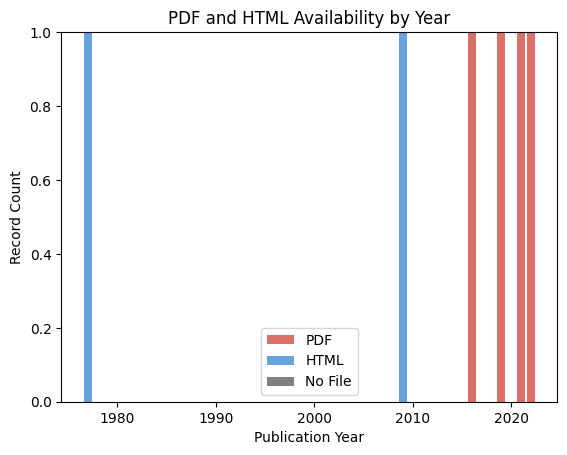

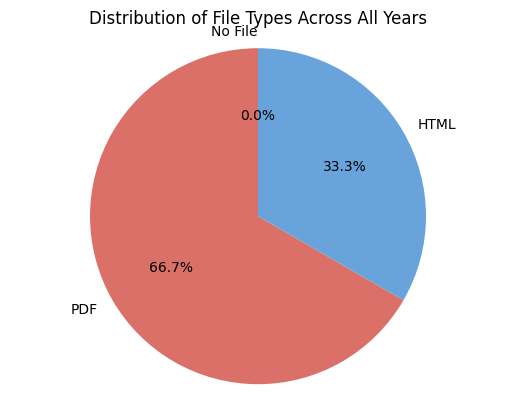

In [9]:
collection = zbf.read_collection("myannotatedcollection.csv")

# make a pie chart of the total number of records
# sections for .html files and .pdf files available
collection.plot_pdfs_available(plot_type="bar", x_axis="Publication Year")
collection.plot_pdfs_available(plot_type="pie")

2025-04-05 20:00:45,996 - INFO - Stacked bar chart for annotations plotted successfully.
2025-04-05 20:00:46,023 - INFO - Pie chart for annotations plotted successfully.


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Annotations Across All Records'}>)

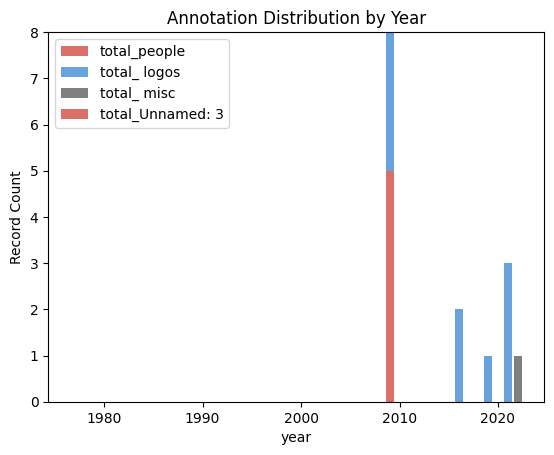

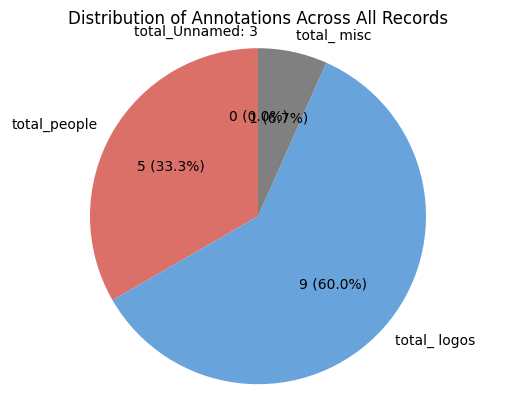

In [10]:
# make a pie chart of the total number of records analyzed
# sections for each annotation condition
collection.plot_annotations(plot_type="bar", x_axis="year")
collection.plot_annotations(plot_type="pie")